In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Scénario
Votre société de consulting informatique vous propose une nouvelle mission au ministère de l'Intérieur, dans le cadre de la lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. Votre mission  : créer un algorithme de détection de faux billets.

Vous vous voyez déjà en grand justicier combattant sans relâche la criminalité organisée en pianotant à mains de maître votre ordinateur, pour façonner ce fabuleux algorithme  qui traquera la moindre fraude et permettra de mettre à jour les réseaux secrets de faux-monnayeurs ! La classe, non ?

... Bon, si on retombait les pieds sur terre? Travailler pour la police judiciaire, c'est bien, mais vous allez devoir faire appel à vos connaissances en statistiques, alors on y va !

# Les données
La PJ vous transmet un jeu de données contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

   1. la longueur du billet (en mm) ;
   2. la hauteur du billet (mesurée sur le côté gauche, en mm) ;
   3. La hauteur du billet (mesurée sur le côté droit, en mm) ;
   4. la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
   5. la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
   6. la diagonale du billet (en mm).
   
# Votre mission


# Mission 0
Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

In [14]:
df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


## Analyse Univariée

In [15]:
df.shape

(170, 7)

In [16]:
df.describe(include = 'all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [18]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [19]:
print(df.duplicated().sum())


0


In [20]:
data = df.groupby("is_genuine").count()
data

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,70,70,70,70,70,70
True,100,100,100,100,100,100


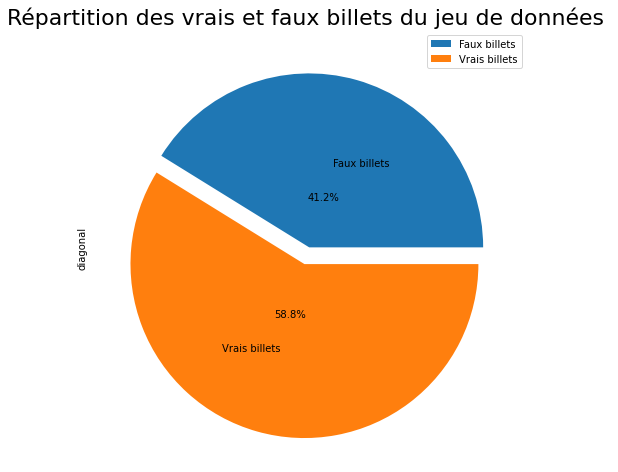

In [21]:
data.plot.pie(y="diagonal",figsize=(8, 8),
                                explode = [0, 0.1],
                                labels = ["Faux billets", "Vrais billets"],
                                autopct = '%1.1f%%',
                                pctdistance = 0.3, labeldistance = 0.5)

plt.title('Répartition des vrais et faux billets du jeu de données ', 
  loc='center', 
  fontsize=22)
plt.savefig('graphiques/01. DESCRIBE_repartition_vrai_faux.png')
plt.show()



### Présentation des données
Le fichier notes.csv liste les caractéristiques de 170 billets de banque différents. On dispose de 6 mesures toutes exprimées en millimètres : diagonale, hauteurs à gauche et à droite, marges hautes et basses, longueur.  ainsi qu'une colonne de type booléenne permettant d'authentifier le billet (vrai ou faux billet de banque).

Il n'y a aucune valeur manquante ou aberrante, aucun nettoyage n'est donc requis.

41,2 % des billets présents dans le jeu de données sont des faux. Analysons les variables indépendamment pour vérifier leur distribution globale.


### Le calcul de la distribution empirique est la première étape pour la représentation graphique d'une variable qualitative.


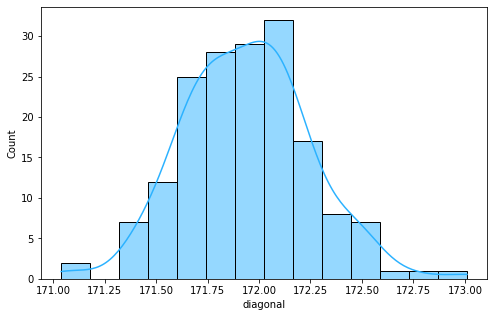

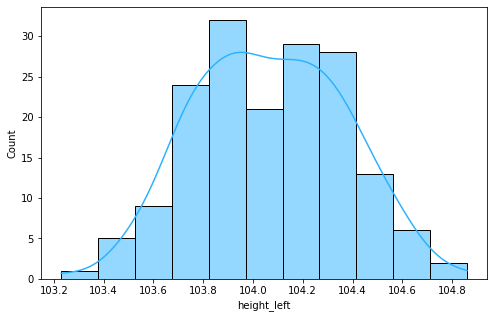

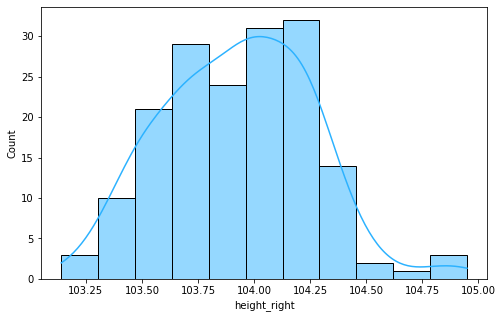

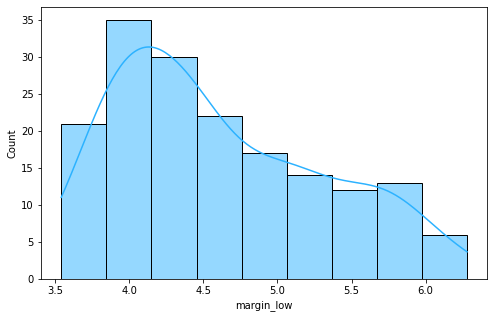

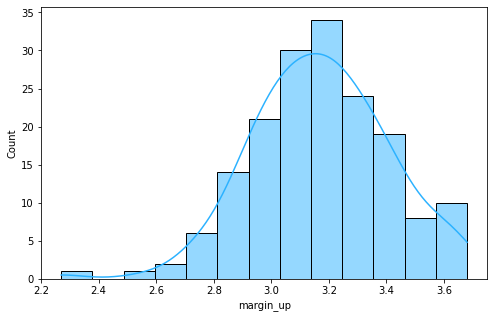

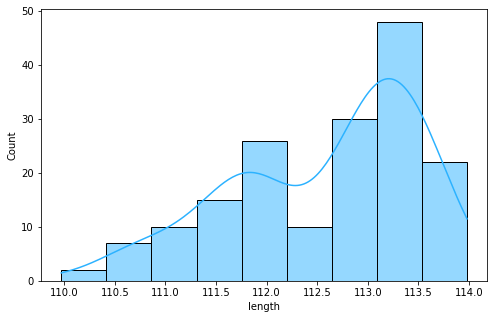

In [22]:
for column in df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']] :
    plt.figure(figsize = (8,5))
    sns.histplot(x=column, data=df, kde=True, color='#2cb2ff')
    plt.savefig("graphiques/02. Histogramme " + str(column) +".jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

    plt.xlabel(column)

In [23]:
#normality of variables in df
import pingouin as pg
pg.normality(df, method='shapiro', alpha=0.05).drop('is_genuine')

#normality: test de normalité univarié.

ModuleNotFoundError: No module named 'pingouin'

Pour les variables margin_low et length, le niveau de test 5% ne permet pas de conclure à l'adéquation à la loi normale, ce que semblent aussi montrer les histogrammes

## Analyse Bivariée

In [ ]:
for column in df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']] : 
        plt.figure(figsize = (8,5))
        sns.boxplot( x=column, y='is_genuine', data=df, orient='h', palette=('#4cb2ff', '#61ba86'))
        plt.savefig("graphiques/03. Boxplot " + str(column) +".jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

On remarque que les variables où il existe une différence un peu plus marquée entre les vrais et faux billets sont les variables length et margin_low 

Les faux billets sont plus courts que les vrais, et leur marge basse est à l'inverse nettement plus longue.

In [ ]:
g = sns.pairplot(df, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
plt.savefig("graphiques/04. Pairplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
plt.show()

sns.pairplot trace l'histogramme de chaque variable quantitative, pour chaque classe de la variable catégorielle is_genuine.

On retrouve ces corrélations sur les graphs ci-dessus. En réalisant ce pairplot avec la séparation de couleurs entre vrais et faux billets, on remarque bien 2 groupes distincts pour chacune des variables, qui permettent certainement de différencier les billets falcifiés.

La longueur et la marge basse permettent le mieux de discriminer les vrais billets des faux.


Il ressort une corrélation linéaire entre les deux variables 'height_left' et 'height_right', le coefficient de pearson sera calculé pour vérifier l'observation.

Même si nous avons déjà les coefficients de Pearson dans le précédent HeatMap, une vérification est pertinente.



In [24]:
#convert bool to int
df['is_genuine'] = df['is_genuine'].astype(int)

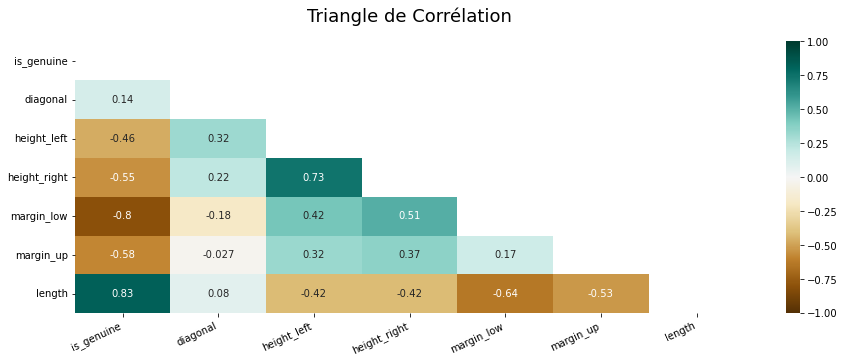

In [25]:
plt.figure(figsize=(15,5))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.xticks(rotation=25, ha='right')
plt.title('Triangle de Corrélation',  fontsize=18, pad=20)
plt.savefig("graphiques/05. Triangle de corrélation.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
    #plt.show()


In [26]:
df.corr(method='pearson')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


Il existe donc une réelle corrélation linéaire entre height_right et height_left .car La valeur obtenue est proche de 1, Concrètement, au plus 'height_left' aura une valeur élevée, au plus 'height_right' le sera aussi.

La valeur obtenue est proche de -1, il existe donc une corrélation linéaire négative entre length et margin_low.